# **Quests 1 - Normalizando dados**

Grupo: Júlia Guedes Almeida dos Santos, Raquel de Godoy Vianna e Thalles José de Souza Cansi

``Deus ajuda quem cedo madruga``

## **Enunciado**

Escolha um conjunto de dados qualquer que contenha pelo menos 3 colunas com dados numéricos. Explore o uso de pelo menos três normalizadores neste conjunto de dados. Relate e discuta sobre o que observou.

## **Introdução**

### Diário 2 da missão!

Depois de longas semanas de discussão sobre o fracasso da última missão, chegamos a uma conclusão: Estava muito difícil visualizar os dados da última missão! Como identificar qual é a relação entre o valor máximo e os demais dados? Além disso, como podemos evitar que um atributo tenha mais peso do que outro ao realizar um modelo de aprendizado de máquina?

Após uma ampla pesquisa na Biblioteca Real encontramos algo que poderia auxiliar nessa missão: Os normalizadores! Existem três tipos principais:
* Normalizador por mínimo e máximo
* Normalizador por máximo e absoluto
* Normalizador padrão

Essa missão terá como objetivo explorar o funcionamento de cada tipo de normalizador, a fim de identificar qual é o melhor para cada tipo de situação. O dataset utilizado será o "penguins" da biblioteca Seaborn (apenas porque Tsuru gosta muito de pinguins).

## **Código**

### Importação de bibliotecas

In [85]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Definição do dataset

In [86]:
df_pinguins = sns.load_dataset("penguins")

In [87]:
df_pinguins = df_pinguins.dropna()
display(df_pinguins)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Aplicação dos normalizadores

In [88]:
from sklearn.preprocessing import MinMaxScaler

def normalizador_minmax(df, coluna):
    """Todos os valores ficam em um intervalo entre 0 (valor mínimo) e 1 (valor máximo)"""
    dados = df[coluna].values.reshape(-1, 1)

    normalizador = MinMaxScaler()

    normalizador.fit(dados)

    dados_normalizados = normalizador.transform(dados)
    
    df_normalizado = pd.DataFrame(dados_normalizados, columns=[coluna])
    
    return df_normalizado
    

In [89]:
from sklearn.preprocessing import MaxAbsScaler

def normalizador_maxabs(df, coluna):
    """Mantém a esparsidade dos dados e os mantém em um intervalo entre [-1, 1]"""

    dados = df[coluna].values.reshape(-1, 1)

    normalizador = MaxAbsScaler()

    normalizador.fit(dados)

    dados_normalizados = normalizador.transform(dados)
    
    df_normalizado = pd.DataFrame(dados_normalizados, columns=[coluna])
    
    return df_normalizado


In [90]:
from sklearn.preprocessing import StandardScaler

def normalizador_padrao(df, coluna):
    """Torna a média 0 e o desvio padrão 1"""
    dados = df[coluna].values.reshape(-1, 1)

    normalizador = StandardScaler()

    normalizador.fit(dados)

    dados_normalizados = normalizador.transform(dados)
    
    df_normalizado = pd.DataFrame(dados_normalizados, columns=[coluna])
    
    return df_normalizado


In [91]:
def desvio_padrao(coluna):
    desvio_padrao = np.std(coluna)
    print(f"O desvio padrão é {desvio_padrao:.2f}")
    
def media(coluna):
    media = np.mean(coluna)
    print(f"A média é {media:.2f}")
    
def valores_minimos(coluna):
    valor_minimo = min(coluna)
    print(f"O valor mínimo é {valor_minimo:.2f}")
 
def valores_maximos(coluna):
    valor_maximo = max(coluna)
    print(f"O valor máximo é {valor_maximo:.2f}")
    
def analise_normalizadores(coluna):
    desvio_padrao(coluna)
    media(coluna)
    valores_minimos(coluna)
    valores_maximos(coluna)

In [92]:
def boxplot(df, nome_da_coluna, valores):
    eixo = sns.boxplot(y=df)
    eixo.set_title(f"{nome_da_coluna}", fontweight = "bold", fontsize = 12)
    eixo.set_xlabel("Frequência")
    eixo.set_ylabel(valores)
    plt.show()

### Análise dos normalizadores

#### *Normalizador por mínimo e máximo*

In [93]:
analise_normalizadores(df_pinguins["flipper_length_mm"])

O desvio padrão é 13.99
A média é 200.97
O valor mínimo é 172.00
O valor máximo é 231.00


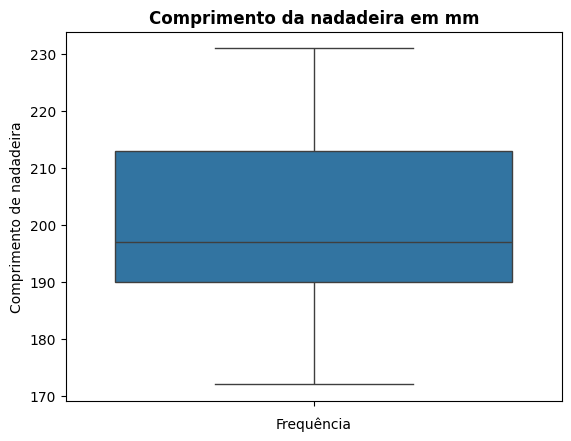

In [94]:
boxplot(df_pinguins["flipper_length_mm"], "Comprimento da nadadeira em mm", "Comprimento de nadadeira")

In [95]:
dados_minmax = normalizador_minmax(df_pinguins, "flipper_length_mm")
display(dados_minmax)

,flipper_length_mm
0,0.152542
1,0.237288
2,0.389831
3,0.355932
4,0.305085
...,...
328,0.711864
329,0.728814
330,0.847458
331,0.677966


In [96]:
analise_normalizadores(dados_minmax["flipper_length_mm"])

O desvio padrão é 0.24
A média é 0.49
O valor mínimo é 0.00
O valor máximo é 1.00


O normalizador por minímo e máximo é conhecido por manter a escala, mas perder a esparsidade dos dados. Na coluna em questão, tal fato não é muito significativo, visto que o tamanho da nadadeira não pode assumir um valor de 0. Logo, a escolha desse normalizador poderia ser feita, visto que auxilia na visualização dos dados. 

Ademais, a presença de outliers pode modificar a escala, dessa forma, verificar a presença desse é fundamental antes da aplicação desse normalizador. A plotagem de um boxplot é uma boa forma de perceber a presença de tais dados e, como notado no gráfico acima, a coluna analisado não apresenta valores tão perceptíveis.

#### *Normalizador por máximo absoluto*

In [97]:
analise_normalizadores(df_pinguins["bill_depth_mm"])

O desvio padrão é 1.97
A média é 17.16
O valor mínimo é 13.10
O valor máximo é 21.50


In [98]:
dados_maxabs = normalizador_maxabs(df_pinguins, "bill_depth_mm")
display(dados_maxabs)

,bill_depth_mm
0,0.869767
1,0.809302
2,0.837209
3,0.897674
4,0.958140
...,...
328,0.637209
329,0.665116
330,0.730233
331,0.688372


In [99]:
analise_normalizadores(dados_maxabs["bill_depth_mm"])

O desvio padrão é 0.09
A média é 0.80
O valor mínimo é 0.61
O valor máximo é 1.00


Diferentemente do normalizador anterior, o normalizador por máximo absoluto apresenta como principal característica a garantia da esparsidade dos dados. Assim como na coluna sobre nadadeiras, a profundidade do bico também não apresenta valores iguais a 0. Consequentemente, a utilização desse normalizador não traria uma grande vantagem, além de facilitar a visualização dos dados, que estariam contidos em um intervalo [-1, 1].

In [100]:
# Confirmação: Realmente as colunas supracitadas não possuem nenhum valore igual a 0 
lista1= list(df_pinguins["flipper_length_mm"])
print(lista1.count(0))

lista2= list(df_pinguins["bill_depth_mm"])
print(lista2.count(0))

0
0


#### *Normalizador Padrão*

In [101]:
analise_normalizadores(df_pinguins["body_mass_g"])

O desvio padrão é 804.01
A média é 4207.06
O valor mínimo é 2700.00
O valor máximo é 6300.00


In [102]:
dados_padrao = normalizador_padrao(df_pinguins, "body_mass_g")
display(dados_padrao)

,body_mass_g
0,-0.568475
1,-0.506286
2,-1.190361
3,-0.941606
4,-0.692852
...,...
328,0.892957
329,0.799674
330,1.919069
331,1.234995


In [103]:
analise_normalizadores(dados_padrao["body_mass_g"])

O desvio padrão é 1.00
A média é -0.00
O valor mínimo é -1.87
O valor máximo é 2.60


Nesse dataset, o uso de um normalizador seria fundamental em razão da diferença de escala entre as colunas. A coluna "body_mass_g" apresenta uma escala maior do que as demais, o que poderia dificultar a aplicação de um modelo k-NN vizinhos mais próximos, visto que o atributo dessa coluna teria um "peso" maior do que as demais, consequentemente, dominairia o cálculo da distância.  

Uma vantagem que o normalizador padrão poderia trazer é tornar a distribuição desses dados normal, auxiliando na visualização de comportamentos semelhantes ao Teoria do Limite Central e facilitando a aplicação de métodos estatísticos[1] Ademais, em relação aos outros normalizadores, por trabalhar com médias, o normalizador padrão é menos sensível a outliers.  

Apesar dessas notáveis vantagem, é inegável que a presença de valores negativos em certas grandezas, como a massa, podem causar certa estranheza. No entanto, esses apenas indicam que o valor em questão está abaixo da média do conjunto de dados.

## **Conclusão**

A partir dessa missão foi possível aprender quais são as vantagens e desvantagens de cada tipo de normalizador. Em síntese, podemos dizer que:

* Normalizador por mínimo e máximo: Mantém a escala, mas perde a esparsidade. Pode ser sensível a outliers.

* Normalizador por máximo absoluto: Mantém a escala e a esparsidade.

* Normalizador Padrão: Torna a distribuição de dados normal e menos sensível a outliers.


O tipo de normalizador escolhido dependerá diretamente do tipo de dado que buscamos analisar. Ou seja, assim como verificado na quest anterior, é importante conhecer profundamente seus dados antes de escolher seus passos na criação de um modelo de aprendizado de máquina. 

Com certeza esse conhecimento será útil para as nossas próximas missões!

## **Bibliografia**

[1]  Fácil, Aprender Estatística. “O que é: Standard Normal Distribution (Distribuição Normal Padrão)”. APRENDER ESTATÍSTICA FÁCIL, 26 de julho de 2024, https://estatisticafacil.org/glossario/o-que-e-standard-normal-distribution-distribuicao-normal-padrao/.

[2] Cassar, Daniel Roberto, "ATP-203 - Tratamento de dados". 5 de agosto de 2024.